## Day 32 Lecture 2 Assignment

In this assignment, we will learn about SVM. We will use the csection dataset loaded below and analyze the model generated for this dataset.

In [0]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Examine the distribution of delivery number, blood pressure and heart problem.

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


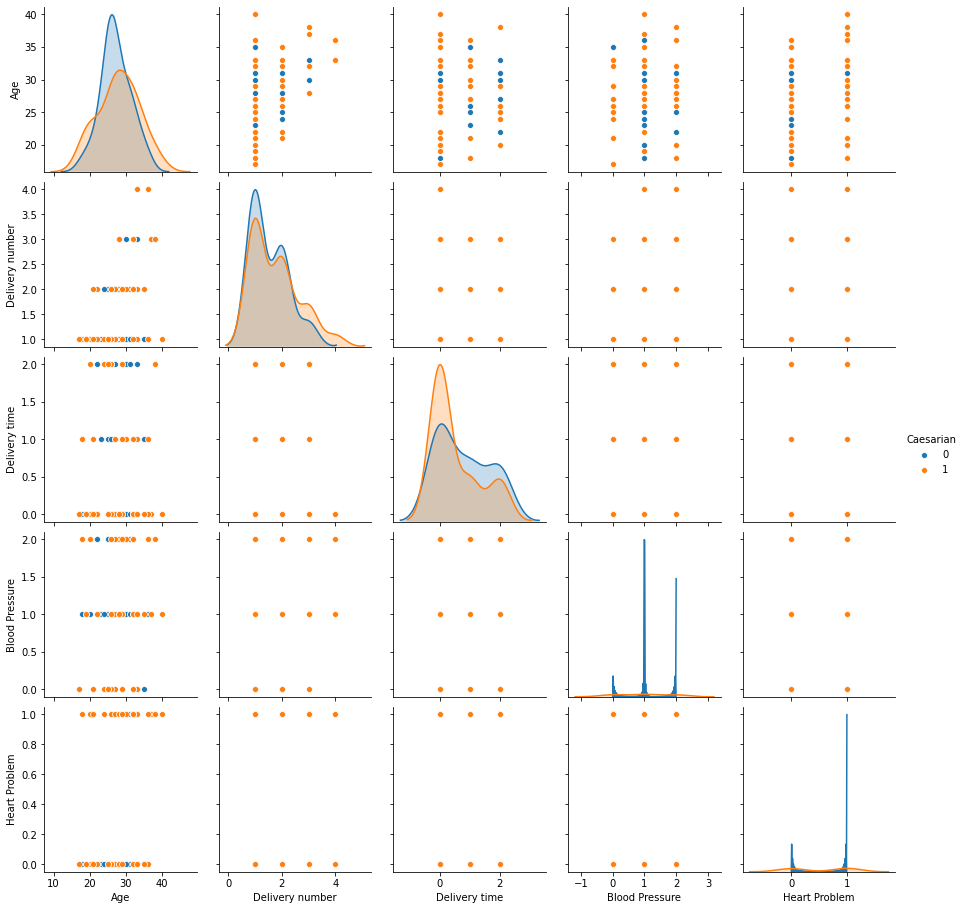

In [0]:
# Age -  ranges from 18 to 40  
# Delivery number - ranges from 1 to 4
# Delivery time -  {0 = timely , 1 = premature , 2 = latecomer}
# Blood of Pressure - {0 = low , 1 = normal , 2 = high }
# Heart Problem - {0 = apt, 1 = inept }

# Target - Caesarian - {0 = No, 1 = Yes }

csection = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/csection.csv"
)

csection = csection.dropna()

display(csection.head())

# Examine the distribution of delivery number, blood pressure and heart problem.
# Will treat:
# age as numeric
# delivery number as numeric
# delivery time as categorical; drop cat 0
# blood pressure as numeric (ordinal)
#   UPDATE: tested out as a dummy variable (drop cat 1) and improved scores over numeric
# heart problem as binary

sns.pairplot(csection, hue='Caesarian')
plt.show()

In [0]:
X = csection.drop(columns=['Caesarian'])
y = csection['Caesarian']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [0]:
# What columns to encode as categorical
# Going to use OneHotEncoder
cat_cols = ['Delivery time', 'Blood Pressure']
# What category to drop from onehotencoding
drop_cats = [0, 1]

# Dividing up remaining columns in case of wanting
# to do some numeric processing.  We wouldn't want to include
# the binary columns in the numeric processing.
num_cols = ['Age', 'Delivery number']
bin_cols = ['Heart Problem']

preprocessing = ColumnTransformer([
    ('encode_cats', OneHotEncoder(drop=drop_cats), cat_cols),                  
], remainder='passthrough')

pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('svm', SVC(kernel='linear'))
])

grid = {
    'svm__C': [0.5, 1.0, 5.0, 10.0]
}

pipeline_cv = GridSearchCV(pipeline, grid, verbose=1)

pipeline_cv.fit(X_train, y_train)
pipeline_cv.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished


{'svm__C': 5.0}

In [0]:
pipeline_cv.cv_results_['mean_test_score']

array([0.52820513, 0.56025641, 0.56153846, 0.56153846])

In [0]:
train_score = pipeline_cv.score(X_train, y_train)
test_score = pipeline_cv.score(X_test, y_test)

print(f'train_score: {train_score}')
print(f'test_score: {test_score}')

train_score: 0.65625
test_score: 0.875


In [0]:
# These scores (esp in light of the cv scores) definitely make me 
# question how much we've learned. With this few number of test cases,
# We might not be able to generalize well, would hope to use more data if
# possible.

In [0]:
y_pred = pipeline_cv.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[6, 1],
       [1, 8]])